# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt
import math


***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

(-2.0, 4.0)

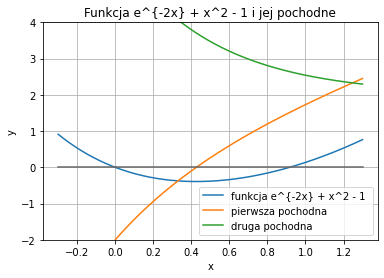

In [2]:
from main import fun, dfun, ddfun
x = np.linspace(-0.3,1.3, 1000)
y = fun(x)
dy = dfun(x)
ddy = ddfun(x)
zero = np.zeros(x.shape)

plt.plot(x,y, label = "funkcja e^{-2x} + x^2 - 1 ")
plt.plot(x,dy, label = 'pierwsza pochodna')
plt.plot(x,ddy, label = "druga pochodna")
plt.plot(x, zero, color = "#666666")
plt.legend()
plt.grid()
plt.title("Funkcja e^{-2x} + x^2 - 1 i jej pochodne")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-2,4])

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize

***Funkcja root***

In [3]:
x0 = 0.5
result_root = scipy.optimize.root(fun, np.array([-1, 2]) )
print("Pierwiastki obliczone przez root(): {}\n".format(result_root.x))

print("Dla sprawdzenia obliczona została wartość funkcji fun w tych punktach:\n")
print("fun({}) = {}".format(result_root.x[0], fun(result_root.x[0])))
print("fun({}) = {}".format(result_root.x[1], fun(result_root.x[1])))

print("\nDla obu punktów fun osiąga wartości bardzo bliskie zeru, różnica między\n"
      "poszukiwanym wynikiem (0), a otrzymanym jest rzędu e-11 - najprawdopodobniej\n"
      "domyślna tolerancja algorytmu root jest ustawiona na taki poziom")


Pierwiastki obliczone przez root(): [1.00378392e-11 9.16562583e-01]

Dla sprawdzenia obliczona została wartość funkcji fun w tych punktach:

fun(1.0037839150354757e-11) = -2.0075718865086856e-11
fun(0.9165625831421041) = 5.509326328478892e-11

Dla obu punktów fun osiąga wartości bardzo bliskie zeru, różnica między
poszukiwanym wynikiem (0), a otrzymanym jest rzędu e-11 - najprawdopodobniej
domyślna tolerancja algorytmu root jest ustawiona na taki poziom


***Funkcja fsolve***

In [4]:
result_fsolve = scipy.optimize.fsolve(fun, np.array([-1, 2]))
print("Pierwiastki obliczone przez fsolve(): {}\n".format(result_fsolve))

print("Pierwiastki znalezione przez funkvję fsolve pokrywają się z tymi znalezionymi\n"
      "przez root. Wcześniej już sprawdziliśmy, że dla tych wartości funckja fun\n"
      "jest bardzo bliska zeru. To znaczy, że także i funkcja fsolve działa poprawnie")

Pierwiastki obliczone przez fsolve(): [1.00378392e-11 9.16562583e-01]

Pierwiastki znalezione przez funkvję fsolve pokrywają się z tymi znalezionymi
przez root. Wcześniej już sprawdziliśmy, że dla tych wartości funckja fun
jest bardzo bliska zeru. To znaczy, że także i funkcja fsolve działa poprawnie


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

***metoda bisekcji:***

Jako że metoda bisekcji wymaga, aby znaki na końcach przedziału <a,b> były różne,
jak i aby w tym przedziale znajdował się tylko jesen punkt zerowy
(inaczej funkcja pominie resztę zer i dostaniemy tylko jedną odpowiedź z wielu) koniecznym było podzielenie
przedziału na dwa podprzedziały, każdy z jednym miejscem zerowym i wykonanie
algorytmu dwa razy, osobno dla każdego podprzedziału.
Oczywiście, funkcja w przedziale <a,b> musi także być ciągła.

Przedział między miejscami zerowymi został odczytany z wcześniej wykreślonego wykresu.

In [5]:
from main import bisection, secant, newton

def bisection_for_time(n:int):
    return bisection(-0.3, 0.5, fun, epsilon= 1e-10, iteration= n),\
           bisection(0.5, 1.3, fun, epsilon= 1e-10, iteration= n)

def secant_for_time(n:int):
    return secant(-0.4, 0.5, fun, epsilon= 1e-10, iteration= n),\
           secant(0.5, 1.4, fun, epsilon= 1e-10, iteration= n)

def newton_for_time(n:int):
      return newton(fun ,dfun, ddfun,-0.5, 0.4, epsilon= 1e-10, iteration= n), \
             newton(fun ,dfun, ddfun, 0.5, 1.4, epsilon= 1e-10, iteration= n)


In [6]:
iter_num = [1,2,4,5,6,8,9,10, 20, 30, 40, 50,60]
time_root = %timeit -r 30 -n 20 -o scipy.optimize.root(fun, np.array([-0.4, 1.4]) )
time_fsolve = %timeit -r 30 -n 20 -o scipy.optimize.fsolve(fun, np.array([-0.4, 1.4]))

times_root = [time_root.average] * np.size(iter_num)
times_fsolve = [time_fsolve.average] * np.size(iter_num)

def_err1 = np.size(iter_num) * [abs(fun(result_root.x[0]))]
def_err2= np.size(iter_num) * [abs(fun(result_root.x[1]))]

284 µs ± 54.3 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
268 µs ± 53.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)


In [7]:
error1 = []
error2 = []
times = []
errorbar1 = []

iter1 = []
iter2 = []


for n in iter_num:

    result1 = bisection(-0.4, 0.5, fun, epsilon= 1e-10, iteration= n)
    error1.append(np.abs(fun(result1[0])))
    iter1.append(result1[1])

    result2 = bisection(0.5, 1.4, fun, epsilon= 1e-10, iteration= n)
    error2.append(np.abs(fun(result2[0])))
    iter2.append(result2[1])

    time = %timeit -r 30 -n 20 -o bisection_for_time(n)
    times.append(time.average)
    errorbar1.append(time.stdev)

70.3 µs ± 15.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
115 µs ± 15.7 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
163 µs ± 19.9 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
169 µs ± 9.38 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
181 µs ± 23.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
275 µs ± 36.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
282 µs ± 51.9 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
267 µs ± 53.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
488 µs ± 55.3 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
642 µs ± 84.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
709 µs ± 114 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
712 µs ± 154 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
654 µs ± 118 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)


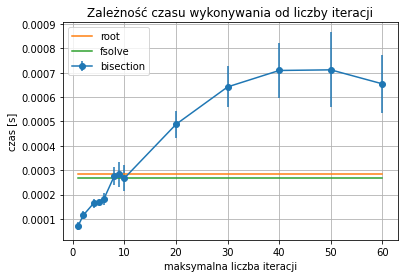

In [8]:
plt.errorbar(iter_num, times, yerr = errorbar1, marker="o", label = "bisection")
plt.plot(iter_num,times_root, label = "root")
plt.plot(iter_num,times_fsolve, label = "fsolve")
plt.grid()
plt.legend()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("czas [s]")
plt.title("Zależność czasu wykonywania od liczby iteracji")
plt.show()

Czas wykonywania dla metody bisekcji liczony był jako suma czasów wykonywania funkcji dla
obu przedziałów - czyli czas obliczenia obu pierwiastków. (ponieważ i funkcja root
i fsolve zwracają po dwa miejsca zerowe)

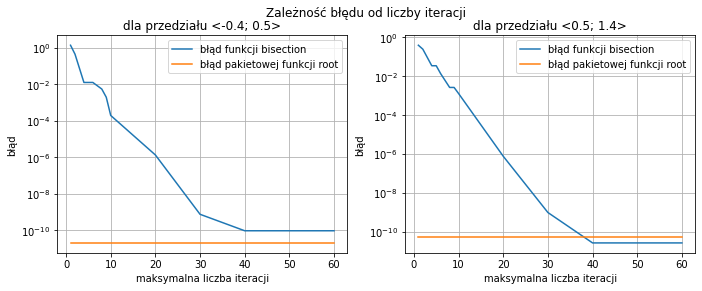

In [9]:
fig = plt.figure(figsize=plt.figaspect(0.35))
fig.suptitle("Zależność błędu od liczby iteracji\n")

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(iter_num, error1, label = "błąd funkcji bisection")
ax1.plot(iter_num, def_err1, label = "błąd pakietowej funkcji root")
ax1.set_title("dla przedziału <-0.4; 0.5>")
ax1.grid()
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel("maksymalna liczba iteracji")
ax1.set_ylabel("błąd")


ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(iter_num, error2, label = "błąd funkcji bisection")
ax2.plot(iter_num, def_err2, label = "błąd pakietowej funkcji root")
ax2.set_title("dla przedziału <0.5; 1.4>")
ax2.set_yscale('log')
ax2.legend()
ax2.grid()
ax2.set_xlabel("maksymalna liczba iteracji")
ax2.set_ylabel("błąd")

plt.show()

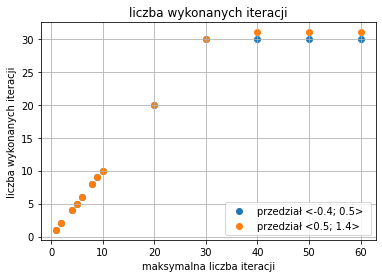

In [10]:
plt.scatter(iter_num, iter1, label = "przedział <-0.4; 0.5> ")
plt.scatter(iter_num, iter2, label = "przedział <0.5; 1.4> ")
plt.grid()
plt.legend(loc = 'lower right')
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("liczba wykonanych iteracji")
plt.title("liczba wykonanych iteracji")
plt.show()

***metoda siecznych***

Tak jak i w przypadku metody bisekcji, metoda siecznych nie działałaby dla pełnego przedziału <a,b>. z
dwoma miejscami zerowymi, dlatego koniecznym było odpowiednie podzielenie przedziału na dwa podprzedziały.

In [11]:
error1 = []
error2 = []
times = []
errorbar1 = []

iter1 = []
iter2 = []


for n in iter_num:

    result1 = secant(-0.4, 0.5, fun, epsilon= 1e-10, iteration= n)
    error1.append(np.abs(fun(result1[0])))
    iter1.append(result1[1])

    result2 = secant(0.5, 1.4, fun, epsilon= 1e-10, iteration= n)
    error2.append(np.abs(fun(result2[0])))
    iter2.append(result2[1])

    time = %timeit -r 30 -n 20 -o secant_for_time(n)
    times.append(time.average)
    errorbar1.append(time.stdev)

82.8 µs ± 14.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
116 µs ± 29.3 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
219 µs ± 66.4 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
168 µs ± 56.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
235 µs ± 29.1 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
317 µs ± 52.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
369 µs ± 68.1 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
354 µs ± 43.4 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
794 µs ± 146 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
827 µs ± 144 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
890 µs ± 256 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
778 µs ± 136 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
778 µs ± 117 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)


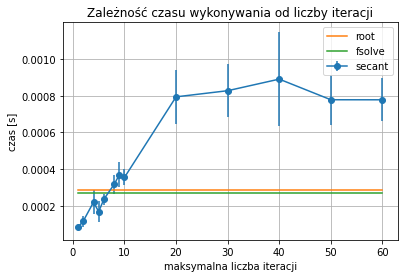

In [12]:
plt.errorbar(iter_num, times, yerr = errorbar1, marker="o", label = "secant")
plt.plot(iter_num,times_root, label = "root")
plt.plot(iter_num,times_fsolve, label = "fsolve")
plt.grid()
plt.legend()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("czas [s]")
plt.title("Zależność czasu wykonywania od liczby iteracji")
plt.show()

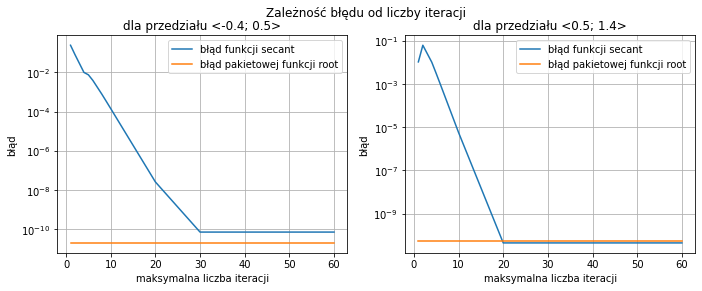

In [13]:
fig = plt.figure(figsize=plt.figaspect(0.35))
fig.suptitle("Zależność błędu od liczby iteracji\n")

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(iter_num, error1, label = "błąd funkcji secant")
ax1.plot(iter_num, def_err1, label = "błąd pakietowej funkcji root")
ax1.set_title("dla przedziału <-0.4; 0.5>")
ax1.grid()
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel("maksymalna liczba iteracji")
ax1.set_ylabel("błąd")


ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(iter_num, error2, label = "błąd funkcji secant")
ax2.plot(iter_num, def_err2, label = "błąd pakietowej funkcji root")
ax2.set_title("dla przedziału <0.5; 1.4>")
ax2.set_yscale('log')
ax2.legend()
ax2.grid()
ax2.set_xlabel("maksymalna liczba iteracji")
ax2.set_ylabel("błąd")

plt.show()

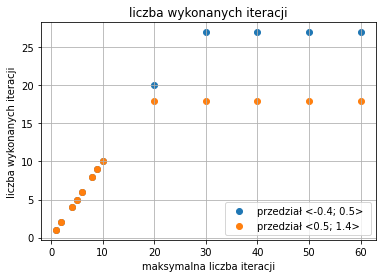

In [14]:
plt.scatter(iter_num, iter1, label = "przedział <-0.4; 0.5> ")
plt.scatter(iter_num, iter2, label = "przedział <0.5; 1.4> ")
plt.grid()
plt.legend(loc = 'lower right')
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("liczba wykonanych iteracji")
plt.title("liczba wykonanych iteracji")
plt.show()

***metoda newtona***

Metoda Newtona wymaga już więcej założeń, niż metoda bisekcji i siecznych. Wymaga ona, aby
funkcja była ciągła i różniczkowalna na przedziale. Znaki funkcji muszą sę różnić na końcach przedziałów,
a znaki pierwszej i drugiej pochodnej (które też muszą być ciągłe na przedziale) muszą być stały znak.

Aby te warunki zostały spełnione, koniecznym było odpowiednie dostosowanie podprzedziałów.

In [15]:
error1 = []
error2 = []
times = []
errorbar1 = []

iter1 = []
iter2 = []


for n in iter_num:

    result1 = newton(fun, dfun, ddfun, -0.5, 0.4, epsilon= 1e-10, iteration= n)
    error1.append(np.abs(fun(result1[0])))
    iter1.append(result1[1])

    result2 = newton(fun, dfun, ddfun, 0.5, 1.4, epsilon= 1e-10, iteration= n)
    error2.append(np.abs(fun(result2[0])))
    iter2.append(result2[1])

    time = %timeit -r 30 -n 20 -o newton_for_time(n)
    times.append(time.average)
    errorbar1.append(time.stdev)

400 µs ± 97.3 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
361 µs ± 54.7 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
466 µs ± 171 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
394 µs ± 34.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
439 µs ± 69.9 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
476 µs ± 168 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
435 µs ± 77.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
450 µs ± 67.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
455 µs ± 80 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
451 µs ± 75.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
421 µs ± 36.1 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
414 µs ± 35.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
422 µs ± 63.4 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)


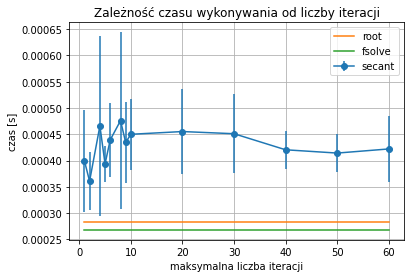

In [16]:
plt.errorbar(iter_num, times, yerr = errorbar1, marker="o", label = "newton")
plt.plot(iter_num,times_root, label = "root")
plt.plot(iter_num,times_fsolve, label = "fsolve")
plt.grid()
plt.legend()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("czas [s]")
plt.title("Zależność czasu wykonywania od liczby iteracji")
plt.show()

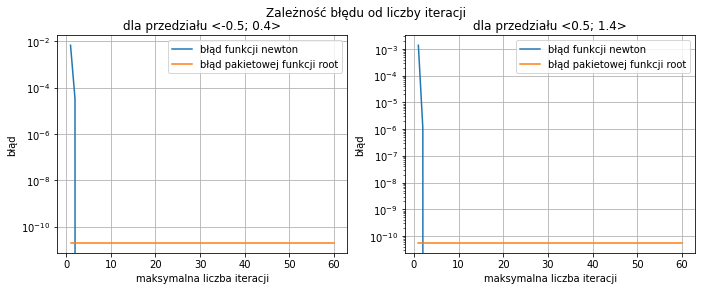

In [17]:
fig = plt.figure(figsize=plt.figaspect(0.35))
fig.suptitle("Zależność błędu od liczby iteracji\n")

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(iter_num, error1, label = "błąd funkcji newton")
ax1.plot(iter_num, def_err1, label = "błąd pakietowej funkcji root")
ax1.set_title("dla przedziału <-0.5; 0.4>")
ax1.grid()
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel("maksymalna liczba iteracji")
ax1.set_ylabel("błąd")


ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(iter_num, error2, label = "błąd funkcji newton")
ax2.plot(iter_num, def_err2, label = "błąd pakietowej funkcji root")
ax2.set_title("dla przedziału <0.5; 1.4>")
ax2.set_yscale('log')
ax2.legend()
ax2.grid()
ax2.set_xlabel("maksymalna liczba iteracji")
ax2.set_ylabel("błąd")

plt.show()

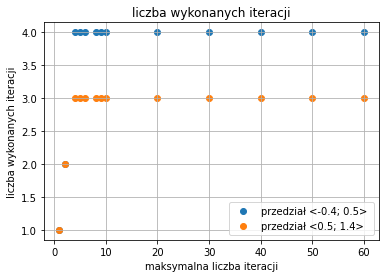

In [18]:
plt.scatter(iter_num, iter1, label = "przedział <-0.4; 0.5> ")
plt.scatter(iter_num, iter2, label = "przedział <0.5; 1.4> ")
plt.grid()
plt.legend(loc = 'lower right')
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("liczba wykonanych iteracji")
plt.title("liczba wykonanych iteracji")
plt.show()

***Podsumowanie:***

Najlepszą z metod iteracyjnych zaimplementowanych na zajęciach okazała się metoda Newtona. Osiągała ona zamierzoną dokładność
już po 3 (lub 4 w drugim przedziale) iteracjach, a łączny czas wykonywania obliczeń dla tej dokładności nie
był nawet 2 razy większy od czasów wykonywania pakietowych funkcji fsolve i root.
Niestety, metoda ta wymaga największej liczby założeń, co ocznacza, że przydałoby się sprawdzić
prawdziwość danych założeń przed użyciem metody newtona, aby dostać odpowiedni wynik, co zaś wymaga dodatkowych obliczeń.

Metoda siecznych i metoda bisekcji spisały się podobnie, mimo że metoda bisekcji wymagała większej ilości iteracji (ok 30 dla bisekcji, w porównaniu do
ok 20 dla siecznych).
Dla czasu wykonywania równego (a przynajmnije podobego) czasaowi wykonywania root i fsolve, metoda siecznych
wykonała około 8 iteracji, co pozostawiło nam błąd rzędy e-3/ e-4. Metoda bisekcji wykonała 10 iteracji,
a jej błąd był bardzo podobny do błędu funkcji secant dla tego czasu.
Jednak do osiąnięcia zamierzonej dokładności ponownie obie metody potrzebowały podobną ilość czasu - ponad 2 razy więcej niż
funkcje root i fsolve.

Jednak należy pamietać, że dla różnych funkcji i różnych przedziałów, wyniki te mogą się różnić. Może się zawsze zdażyć,
że metoda bisekcji dla pewnych iteracji będzię się "oddalała" od miejsca zerowego, a może się zdażyć, że
znajdziemy pierwiastek (a dokładniej jego przybliżenie) już po jednej bądź dwóch iteracjach.